**Pytorch Tutorial**


In [1]:
import numpy as np
import math
import matplotlib.pyplot as pltrt
import time
import random

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Tensors

Tensors are the base data structures of PyTorch which are used for building different types of neural networks. They can be considered as the generalization of arrays and matrices; in other words, tensors are N-dimensional matrices or multidimensional arrays.

PyTorch tensors are similar to NumPy’s n-dimensional arrays. But unlike ndarrays of numpy, these tensors can be stored on a GPU RAM as well as the CPU RAM, and than to be multiplied efficientlly on the small many cores of the GPU (this is not the case with NumPy arrays). This is a major advantage of using tensors.

###  Tensor Initialization

Tensors can be created by using a list:

In [2]:
x = torch.tensor([1,2,3])
print(x)

tensor([1, 2, 3])


You can specify the data type of the tensor by using the ``dtype`` argument,
similarily to numpy, you can check the type of the tensor by using the ``dtype`` attribute:

In [3]:
x = torch.tensor([1,2,3], dtype = torch.float32)
print(x)
print(x.dtype)

tensor([1., 2., 3.])
torch.float32


It's important to note here that one way to evaluate a GPU is by its TFLOPS - the capability of a processor to calculate one trillion floating-point operations per second. These operations rate usually refer to a 32bit floating point and abiously depends on the tensot type. operations on a 64bit floating point will be half the rate and so on.

Let’s say we want a matrix of shape 3*3 having all zeros/ones. Take a moment to think – how can we do that using NumPy?

In [4]:
a = np.zeros((3,3))
b = np.ones((3,3))

print(a)
print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Similar to NumPy, PyTorch also has the zeros() and ones() function which takes the shape as input and returns a matrix of zeros or ones , respectively, of a specified shape.

In [5]:
a = torch.zeros((3,3))
b = torch.ones((3,3))

print(a)
print(b)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


The ``random.randn()`` function returns random numbers that follow a standard normal distribution. 

We can initialize a similar matrix of random numbers using PyTorch:



In [6]:
a = torch.randn(2,3)

print(a)

tensor([[ 0.3439,  1.0207,  0.4682],
        [-0.7046, -1.6358,  0.8648]])


### Tensor Copying

As you will see later in this chapter,
most of the tensor operations create a view of the origin tensor.

Since it is a room for errors you must notice when you need to create a copy of your origin tensor.

Unlike numpy, in torch the syntax is a bit different.

The function `copy_` copies the tensor given as a parameter.

In [7]:
a = torch.randn(3,3)
print(a, "\n")

b = torch.empty(3,3)
b.copy_(a)
print(b, "\n")

a[0,0] = 10
print(a[0,0], "\n")
print(b[0,0])

tensor([[ 0.0031,  1.5390,  0.1507],
        [ 0.1464,  0.4540, -1.6974],
        [ 0.9994,  2.9649, -0.7882]]) 

tensor([[ 0.0031,  1.5390,  0.1507],
        [ 0.1464,  0.4540, -1.6974],
        [ 0.9994,  2.9649, -0.7882]]) 

tensor(10.) 

tensor(0.0031)


The function `clone` also copies a tensor.

However, unlike `copy_`, this function is recorded in the computation graph. 
(As you will see later in this tutorial, it means that gradients propagating to the cloned tensor will propagate to the original tensor.)

In [8]:
a = torch.randn(3,3)
print(a, "\n")

b = torch.empty(3,3)
b = a.clone()
print(b, "\n")

a[0,0] = 10
print(a[0,0], "\n")
print(b[0,0])

tensor([[-0.7539,  1.5914,  0.4844],
        [ 0.2603,  0.5689, -1.4147],
        [ 0.7192, -0.7546, -0.0325]]) 

tensor([[-0.7539,  1.5914,  0.4844],
        [ 0.2603,  0.5689, -1.4147],
        [ 0.7192, -0.7546, -0.0325]]) 

tensor(10.) 

tensor(-0.7539)


### Shaping and Reshaping

You can get the shape of a tensor using the ``.size()`` method or just the `.shape` attribute.

In [9]:
a = torch.randn(2,3)

print(a.size())
print(a.shape)

torch.Size([2, 3])
torch.Size([2, 3])


We can use the `.view()` function and pass the required shape as a parameter. 

It will return a tensor with the new shape. 

Pay attention that the returned tensor isn't a copy of the original tensor, it will share the underling data with the original tensor.

Let’s try to convert the above tensor of shape (2,3) to a tensor of shape (6,1):



In [10]:
b = a.view(6,1)
print(b)
print(b.shape)

tensor([[ 1.7586],
        [-1.3641],
        [ 0.8333],
        [-1.1916],
        [ 1.2126],
        [ 1.2027]])
torch.Size([6, 1])


In [11]:
a[0][0]=5
print(b)

tensor([[ 5.0000],
        [-1.3641],
        [ 0.8333],
        [-1.1916],
        [ 1.2126],
        [ 1.2027]])


If you know you want, for example, 6 rows however, you want torch to conclude the number of columns, you should send -1 as the columns dim argument

In [12]:
a = torch.randn(3,4,5)
b = a.view(-1,12)
print(b)
print(b.shape)

tensor([[ 0.5073, -1.0995, -1.3037, -1.8282,  2.6740, -0.6350, -1.0132, -1.3216,
          2.1444, -0.9532,  0.4376, -0.9195],
        [ 0.1018, -0.7428, -1.0972,  1.8049,  0.0564,  0.5623,  0.1919,  0.7953,
         -1.0935, -0.5183,  2.3910, -1.6647],
        [-0.9019, -0.7969,  1.6069, -2.2665,  0.6811,  1.0040, -2.0533,  0.4894,
          0.2383,  0.0669,  0.1759,  0.2783],
        [-0.3404,  0.6444,  1.9914,  0.5651,  0.3954, -0.6160, -0.1313, -0.3293,
         -0.6568, -1.4952,  1.2793, -0.0084],
        [ 0.7884,  0.3921,  2.1639, -0.8934,  0.4576, -0.0099,  1.9759,  0.7851,
         -0.0321,  0.7753,  0.8659, -0.2436]])
torch.Size([5, 12])


If you have two twnsors with the same amount of elements and you want to make their shape the same you can pass one's shape as a parameter to the `view` function

In [15]:
a = torch.randn(3,4,5)
print(a.size())
b = torch.randn(6, 10)
print(b.size(), "\n")

b = b.view(a.size())
print(b.size())

torch.Size([3, 4, 5])
torch.Size([6, 10]) 

torch.Size([3, 4, 5])


However, you can do it more elegantlly using the `view_as` function:

In [16]:
a = torch.randn(5,3,4)#(3,4,5)
print(a.size())
b = torch.randn(6, 10)
print(b.size(), "\n")

b = b.view_as(a)
print(b.size())

torch.Size([5, 3, 4])
torch.Size([6, 10]) 

torch.Size([5, 3, 4])


You can also use the `torch.reshape` method,
however, pay attentaion that torch.reshape may return a copy or a view of the original tensor - `torch.reshape` method will try to share the memory of the returned tensor, but if that complicates things for the torch architecture torch will make a clone of it and will return a new reshaped tensor. Thus you can not count on that to return a view or a copy.

In order to transpose a 2D tensor, you can use ``torch.t`` as follows:

In [17]:
a = torch.randn(2,3)

print(a)
print(f"tensor a shape is {a.shape} \n")

a_t = torch.t(a)
print(a_t)
print(f"the transpose of tensor a shape is {a_t.shape} \n")

tensor([[-3.2093,  1.9752,  2.9178],
        [ 0.7124, -0.8789,  0.3876]])
tensor a shape is torch.Size([2, 3]) 

tensor([[-3.2093,  0.7124],
        [ 1.9752, -0.8789],
        [ 2.9178,  0.3876]])
the transpose of tensor a shape is torch.Size([3, 2]) 



Pay attention that 0-D and 1-D tensors are returned as is. 

In [18]:
a = torch.randn(5)
print(a.shape, "\n")

a_t = torch.t(a)
print(a_t.shape)

torch.Size([5]) 

torch.Size([5])


If you want to transpose a tensor with more than 2 dimensions, you can use the `permute` function:

In [19]:
a = torch.randn(3, 4, 5)
print(a.size())
b.copy_(a.permute(2, 0, 1))
print(b.size())

print(a[1,2,3] == b[3,1,2])
print(a[1,2,3] == b[1,2,3])

torch.Size([3, 4, 5])
torch.Size([5, 3, 4])
tensor(True)
tensor(False)


### Mathematical Operations

Let’s now see how we can do mathematical operations using PyTorch on tensors. So, first, let’s initialize two tensors:

In [20]:
a = torch.randn(2,3)
b = torch.randn(2,3)

print(a)
print(b)

tensor([[-0.8360, -0.9178,  2.0370],
        [-1.7283, -1.0608, -0.2821]])
tensor([[ 1.1907, -0.2632, -0.2102],
        [ 0.9699,  1.0924, -0.3522]])


There are 3 different ways to perform mathematical operations:

1. Well known  mathematical operators:

In [21]:
# addition
print(a+b, "\n")       # equivalent to: torch.add(a, b)

# subtraction
print(b-a, "\n")       # equivalent to: torch.sub(b, a)

# elementwise multiplication
print(a*b, "\n")       # equivalent to: torch.mul(a, b)

# dot product
print(a@torch.t(b), "\n")       # equivalent to: torch.dot(a, b)

# division
print(b/a, "\n")       # equivalent to: torch.div(b, a)


tensor([[ 0.3547, -1.1810,  1.8268],
        [-0.7585,  0.0316, -0.6343]]) 

tensor([[ 2.0268,  0.6546, -2.2472],
        [ 2.6982,  2.1532, -0.0702]]) 

tensor([[-0.9955,  0.2416, -0.4282],
        [-1.6762, -1.1588,  0.0994]]) 

tensor([[-1.1821, -2.5310],
        [-1.7194, -2.7357]]) 

tensor([[-1.4243,  0.2868, -0.1032],
        [-0.5612, -1.0298,  1.2488]]) 



2. Torch methods

In [22]:
# addition
print(torch.add(a, b), "\n")

# subtraction
print(torch.sub(b, a), "\n")

# elementwise multiplication
print(torch.mul(a, b), "\n")

# dot product
print(torch.mm(a, torch.t(b)), "\n")

# division
print(torch.div(b, a), "\n")


tensor([[ 0.3547, -1.1810,  1.8268],
        [-0.7585,  0.0316, -0.6343]]) 

tensor([[ 2.0268,  0.6546, -2.2472],
        [ 2.6982,  2.1532, -0.0702]]) 

tensor([[-0.9955,  0.2416, -0.4282],
        [-1.6762, -1.1588,  0.0994]]) 

tensor([[-1.1821, -2.5310],
        [-1.7194, -2.7357]]) 

tensor([[-1.4243,  0.2868, -0.1032],
        [-0.5612, -1.0298,  1.2488]]) 



3. Torch inplace methods

  The inplace methods functionality is the same as the regular methods shown above, accept that their reult is written to the object they were operated on.
The inplace methods always followed by an underscore.

In [23]:
# addition
a.add_(b)
print(a, "\n")


tensor([[ 0.3547, -1.1810,  1.8268],
        [-0.7585,  0.0316, -0.6343]]) 



### Concatenating

Let’s say we have two tensors as shown below and we want to concatenate them


In [24]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])

print(a, "\n")
print(b)

tensor([[1, 2],
        [3, 4]]) 

tensor([[5, 6],
        [7, 8]])


In [25]:
# concatenating vertically
torch.cat((a,b))

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

As you can see, the second tensor has been stacked below the first tensor. We can concatenate the tensors horizontally as well by setting the dim parameter to 1:


In [26]:
# concatenating horizontally
torch.cat((a,b),dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

### Accumulating Functions

The accumulating functions are mostly the same in torch tensors as in numpy arrays.


In [27]:
a = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
print(a)

tensor([[1., 2.],
        [3., 4.]])


In [28]:
a_sum = a.sum()
print(f"a.sum() = {a_sum}")

a.sum() = 10.0


Similarily to numpy, you can specify the axis which you want to accumulate along: 

``axis=0`` for columns and ``axis=1`` for rows (as oppose to numpy).

In [29]:
# the mean of each column in the tensor a:
a.mean(axis=0)

tensor([2., 3.])

A very important function to use after you have done an accumulationg operation is the ``torch.item`` function.
This function return a scalar from a tensor which contain only one item in it.

In [30]:
x = torch.tensor([[1]])
print(x, "\n")

print(x.item())

tensor([[1]]) 

1


Unlike numpy, `torch.max` return both the maximal element in  a tensor and its index.

Use `dim=1` to maximize over each row of the tensor columns and `dims=0` to maximize over each column of the tensor rows.

Take a moment and think, why is it useful? Yoy will see in the upcoming chapters.

In [31]:
x = torch.randn(3,5)
print(x, "\n")

value, index = torch.max(x, dim=1) 
print(value)
print(index)

tensor([[ 0.9915, -1.2090,  0.5122,  0.8937,  0.0353],
        [ 1.0674,  1.0776,  0.4393, -1.2444, -0.5916],
        [-0.2660, -0.7268, -0.1183, -0.8859, -0.3968]]) 

tensor([ 0.9915,  1.0776, -0.1183])
tensor([0, 1, 2])


### Numpy Bridge

Converting a torch Tensor to a numpy array and vice versa is a breeze. The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

In [32]:
a = np.array([[1,2],[3,4]])
print(a, "\n")

tensor = torch.from_numpy(a)
print(tensor)

[[1 2]
 [3 4]] 

tensor([[1, 2],
        [3, 4]])


Pay attenation that the numpy array and the torch tensor share the same memory,
if you change the numpy array you chang the tensor and vice versa.

In [33]:
a[0,0] = 5
print(tensor, "\n")

tensor[0,0] = 6
print(a)

tensor([[5, 2],
        [3, 4]]) 

[[6 2]
 [3 4]]


In [34]:
b = tensor.numpy()
print(b)

[[6 2]
 [3 4]]


## Autograd: Automatic Differentiation

Central to all neural networks in PyTorch is the ``autograd`` package. Let’s first briefly visit this.

The autograd package provides automatic differentiation for all operations on Tensors. 

It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

``torch.Tensor``, which you saw above, is the central class of the package. 

If you set its attribute ``.requires_grad`` as ``True``, it starts to track all operations on it. 

When you finish your computation you can call ``.backward()`` and have all the gradients computed automatically. 

The gradient for this tensor will be accumulated into .grad attribute.

There’s one more class which is very important for the autograd implementation - a ``Function``.

Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a ``.grad_fn`` attribute that references to a Function that has created the Tensor (except for Tensors created by the user - their ``grad_fn`` is ``None``).

If you want to compute the derivatives, you can call ``.backward()`` on a Tensor. If Tensor is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to ``backward()``, however if it has more elements, you need to specify a gradient argument that is a tensor of matching shape.

In [35]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [36]:
y = x + 2
print(y, "\n")

z = y * y * 3
print(z, "\n")

out = z.mean()
print(out)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) 

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 

tensor(27., grad_fn=<MeanBackward0>)


Let’s backprop now. 

In [37]:
out.backward()

Print gradients d(out)/dx

In [38]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Calculating the gradients with respect to all of our parameters is time-consuming.

Therefore, there are times when we don't want the gradients to be computed.

There are 3 ways to stop the gradients calculations:

1. Updating the ``.requires_grad`` attribute as ``False``

In [39]:
a = torch.randn(3, requires_grad=True)
print(a)
print(a.requires_grad, "\n")

a.requires_grad_(False)

print(a)
print(a.requires_grad)

tensor([-0.4713, -0.6872,  1.2077], requires_grad=True)
True 

tensor([-0.4713, -0.6872,  1.2077])
False


2. Call .detach()

In [40]:
a = torch.randn(3, requires_grad=True)
print(a)
print(a.requires_grad, "\n")

b = a.detach()

print(b)
print(b.requires_grad)

tensor([-1.0438, -0.7316,  1.5778], requires_grad=True)
True 

tensor([-1.0438, -0.7316,  1.5778])
False


Pay attention that the gradients above share the same memory.

3. Using the ``with`` statement

In [41]:
a = torch.randn(3, requires_grad=True)
print(a)
print(a.requires_grad, "\n")

with torch.no_grad():
  b = a+2
  print(b)
  print(b.requires_grad)

tensor([-0.6203, -0.7800, -0.6299], requires_grad=True)
True 

tensor([1.3797, 1.2200, 1.3701])
False


As mentioned earlier, the gradients are accumulated in the ``.grad``  attribute.

Let's see an example:

In [42]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


That isn't what we want.

We must zero the gradients before each iteration.

In [43]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
  
    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


##  Training Pipeline Overview: Model, Loss, and Optimizer

There are 3 common steps in order to make NN using pytorch.
1. Design model (input, output, forward pass with different layers).
2. Construct loss and optimizer.
3. Training loop:
      - Forward - compute prediction and loss.
      - Backward - compute gradients.
      - Update weights.

Its important to understand the different components of the process and the well defined separation between them.
- Forward - only needs the X features, and the current weights.
- Backward - only needs the y label and the y_predicted to be given to the loss. So the gradients can be acumulated with respect to the loss (being calculated using ``loss.backprop()``).
- Update weights - only needs the gradients and the optimizing method.

##  Linear Regression

Here is our first very simple example of NN.

This NN implements the simple linear regression.

The most important thing to take from this example is the structure of our code.

First, let's make a small dataset:

In [44]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, 
                                            n_features=1, 
                                            noise=15, 
                                            random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

Text(0, 0.5, 'y')

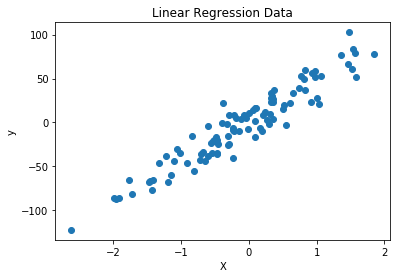

In [45]:
plt.scatter(X , y)
plt.title("Linear Regression Data")
plt.xlabel("X")
plt.ylabel("y")

Step No. 1:

We define our NN as a class that inherite from ``nn.Module``.

In this class we must implement two methods: the ``__init__`` method
and the ``forward`` method.

In the ``__init__`` method we firstly calling ``nn.Module`` ``__init__`` and then we define our NN layers, their input and outputs sizes.

The  ``forward`` method performs the forward propagtion using the layers defined in the initialization. Most layers are already implemented for you in the ``nn`` module of pytorch. the first layer to be used is a ``nn.Linear`` layer, defined by its input dimenstions and output dimensions, storing the wights inside. In order to apply the layer one need just to pass an X to it as if it was a function.

In [46]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)   

In [47]:
model = LinearRegression(n_features, 1)
model

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

Model class was made so it will contain layers that operate in a sequence. As such, a very convineint way to reffer to all parameters of all layers is the method ``.parameters()``.

In [48]:
w, b = model.parameters()

Text(0, 0.5, 'y')

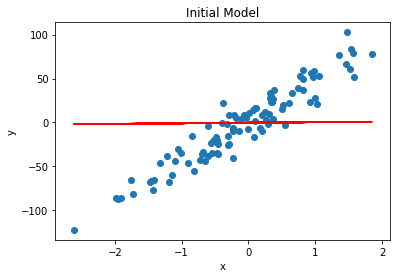

In [49]:
plt.plot(X, w.item()*X+b.item(), c="r")
plt.scatter(X, y)
plt.title("Initial Model")
plt.xlabel("x")
plt.ylabel("y")

Step No 2.

We define our loss function from ``torch.nn`` and our optimizer from ``torch.optim``. 

Notice that as ``nn.Linear``, a loss function is just another layer function operating on a layer output - simply with no weights stored inside. which puts it in the ``torch.nn`` module.

Also notice how an optimizer needs to accept the parameters on which to optimize on. In the example above we chose to include all parameters off the model in the optimizing process. In other scenarios, For example in transfer learning, we would want to limit the parameters to be optimizing on just the last layers and not change the first layers.

In [50]:
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Step No 3.

Here we perform our training loop.

- forward propagation.
- computing loss.
- back propagation.
- parameters update.

In [51]:
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(y_predicted, y)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters()
        print('epoch ', epoch+1,' loss = ', l.item())


epoch  10  loss =  1413.57958984375
epoch  20  loss =  1063.767822265625
epoch  30  loss =  813.8297729492188
epoch  40  loss =  634.9125366210938
epoch  50  loss =  506.60870361328125
epoch  60  loss =  414.44952392578125
epoch  70  loss =  348.151611328125
epoch  80  loss =  300.3908996582031
epoch  90  loss =  265.9395446777344
epoch  100  loss =  241.0592803955078


In [52]:
w, b = model.parameters()

Text(0, 0.5, 'y')

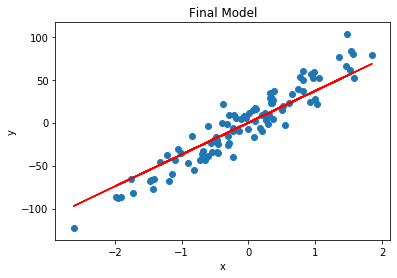

In [53]:
plt.plot(X, w.item()*X+b.item(), c="r")
plt.scatter(X, y)
plt.title("Final Model")
plt.xlabel("x")
plt.ylabel("y")

Try running the training again and examine what happened. Do you expect that to happen?

## ✍️  Logistic Regression

In this section, you ware going to implement logistic regression using pytorch.

A short reminder of logistic regression:

Let  $W$ be our parametrs matrix and $b$ our bias.

The logistic function is defined by the following formula of the sigmoid function:

$\sigma(x; W,b) = \frac{1}{1+e^{-(W\cdot x+b)}}$


✍️ Step No. 0:

Load the data and shape it so you can train a model on it.

In [113]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

### ✍️ Split your data to train set and test set. Use 20% of your data as test.
### START CODE HERE ### (1 line of code)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
### END CODE HERE ###


### ✍️ Scale your data using the StandardScaler.
### START CODE HERE ### (~3 lines of code)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### END CODE HERE ###

### ✍️ Transform your data and labels to tensors. 
### Don't forget to convert their dtype to float32.
### START CODE HERE ### (4 lines of code)
X_train, y_train = torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(y_train).type(torch.float32)
X_test, y_test = torch.from_numpy(X_test).type(torch.float32), torch.from_numpy(y_test).type(torch.float32)
### END CODE HERE ###

### ✍️ Reshape your lables.
### START CODE HERE ### (2 lines of code)

# Why?
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


### END CODE HERE ###

✍️ Step No. 1:

Define the LogisticRegression model. (read relevant layers in the nn documentaion)

In the ``__init__`` method, define the layer and the activation.

In the ``forward`` method, define forward propagartion.

Finally, initiate a new LogisticRegression instance.

In [114]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        ### START CODE HERE ### (2 lines of code)
        self.linear = nn.Linear(n_input_features, 1)
        self.sig = nn.Sigmoid()
        ### END CODE HERE ###

    def forward(self, x):
        ### START CODE HERE ### (~1-3 lines of code)
        out = self.linear(x)
        out = self.sig(out)
        return out
        ### END CODE HERE ###

### START CODE HERE ### (1 line of code)
model = LogisticRegression(n_features)
### END CODE HERE ###
print(model)

LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
  (sig): Sigmoid()
)


✍️ Step No 2.

Now, we define our loss function as the binary cross-entropy loss,

and stochastic gradient-descent as our optimization algorithm.

In [115]:
num_epochs = 100
learning_rate = 0.01

### START CODE HERE ### (2 lines of code)
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
### END CODE HERE ###

✍️ Step No 3.

Now, we perform our training loop.

- forward propagation.
- computing loss.
- back propagation.
- parameters update.

In [118]:
for epoch in range(num_epochs):

  ### Forward pass
  ### START CODE HERE ### (1 line of code)
    y_pred = model(X_train)
  ### END CODE HERE ###

  ### Loss calculation
  ### START CODE HERE ### (1 line of code)
    curr_loss = loss(y_pred, y_train) # NOTE: preds should be first
  ### END CODE HERE ###

  ### Backward pass
  ### START CODE HERE ### (3 lines of code)
    curr_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  ### END CODE HERE ###

  ### Print loss every 10 epochs
    
    if((epoch+1)%10 == 0):
        print(f"epoch: {epoch+1}, loss={curr_loss.item()}")
    
  ### START CODE HERE ### (2 lines of code)

  ### END CODE HERE ###

epoch: 10, loss=0.21745291352272034
epoch: 20, loss=0.21006450057029724
epoch: 30, loss=0.20350202918052673
epoch: 40, loss=0.19762291014194489
epoch: 50, loss=0.1923161894083023
epoch: 60, loss=0.18749448657035828
epoch: 70, loss=0.18308767676353455
epoch: 80, loss=0.17903903126716614
epoch: 90, loss=0.17530207335948944
epoch: 100, loss=0.17183829843997955


✍️ Finally, We must check how our model perforn on the test set.

In this part we make a forward pass, however, we don't want the gradient to be calculated.

In [124]:
### Compute the test accuracy. 
### Use 0.5 as the classification border, samples with sigmoid result greater
### or equal to 0.5 will be classified as class 1, 
### and all the others will be classifies as class 0.
### START CODE HERE ### (~5 lines of code)
from sklearn.metrics import accuracy_score
with torch.no_grad():
    y_preds = np.round(model(X_test)) # turn preds to ints
    print(f"accuracy: {accuracy_score(y_preds, y_test)}")
### END CODE HERE ###

accuracy: 0.9473684210526315


## Dataset and DataLoader

As You probably saw in Andrew's course,
the gradient computation is not efficient for the whole data set.

Therefore, we divide the dataset into small batches, and compute the gradient on each batch.

A short reminder about the defenitions regarding this part:
- epoch - one forward and backward pass of ALL training samples.
- batch_size - number of training samples used in one forward/backward pass.
- number of iterations - number of passes, each pass (forward+backward) using #batch_size number of sampes.

e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch.





As explained above it might be a good idea to an object representing a Dataset to so we can feed the model in training time.

In order to implement such a Dataset, we will inherit the class ``Dataset`` of pytorch.

We will implement the following methods: ``__init__``, ``__getitem__`` , and ``__len__``,

using the scikit-learn wine dataset.

In [126]:
class WineDataset(Dataset):

    def __init__(self):
        data = datasets.load_wine(return_X_y=True)
        self.n_samples = len(data[1])

        self.x_data = torch.from_numpy(data[0])
        self.y_data = torch.from_numpy(data[1]) 

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

Now, let's see that we can get the first sample:

In [163]:
first_data = dataset[0]
features, labels = first_data
print(features, "\n", labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) 
 tensor(0)


Once we defined our ``Dataset`` object we can use the already implemented ``DataLoader`` class wraping the ``Dataset`` object with batching skills and more.

The main aim of the ``DataLoader`` is to provide us a convinient way to iterate through the batches of our dataset.



In [164]:
data_loader = DataLoader(dataset=dataset,
                          batch_size=5,
                          shuffle=True,
                          num_workers=2)

We have just defined our data loader,

now, let's convert it to an iterator and look at one random sample.

In [165]:
dataiter = iter(data_loader)
data = dataiter.next()
features, labels = data
print(features, "\n", labels)

tensor([[1.3160e+01, 2.3600e+00, 2.6700e+00, 1.8600e+01, 1.0100e+02, 2.8000e+00,
         3.2400e+00, 3.0000e-01, 2.8100e+00, 5.6800e+00, 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        [1.2080e+01, 2.0800e+00, 1.7000e+00, 1.7500e+01, 9.7000e+01, 2.2300e+00,
         2.1700e+00, 2.6000e-01, 1.4000e+00, 3.3000e+00, 1.2700e+00, 2.9600e+00,
         7.1000e+02],
        [1.2850e+01, 3.2700e+00, 2.5800e+00, 2.2000e+01, 1.0600e+02, 1.6500e+00,
         6.0000e-01, 6.0000e-01, 9.6000e-01, 5.5800e+00, 8.7000e-01, 2.1100e+00,
         5.7000e+02],
        [1.4380e+01, 3.5900e+00, 2.2800e+00, 1.6000e+01, 1.0200e+02, 3.2500e+00,
         3.1700e+00, 2.7000e-01, 2.1900e+00, 4.9000e+00, 1.0400e+00, 3.4400e+00,
         1.0650e+03],
        [1.2870e+01, 4.6100e+00, 2.4800e+00, 2.1500e+01, 8.6000e+01, 1.7000e+00,
         6.5000e-01, 4.7000e-01, 8.6000e-01, 7.6500e+00, 5.4000e-01, 1.8600e+00,
         6.2500e+02]], dtype=torch.float64) 
 tensor([0, 1, 2, 0, 2])


✍️ Iterate through the batches of the dataset.
For each batch print how much samples it has from each class.

In [166]:
### START CODE HERE ### (~5 lines of code)
for i, (features, labels) in enumerate(dataiter):
    bin_count = labels.bincount()
    # the 'if else' are for cases of bathes with no occurances of a class
    c_0, c_1, c_2 = bin_count[0], 0 if len(bin_count)==1 else bin_count[1], 0 if len(bin_count)==2 else bin_count[2]
    print(f"In batch {i}: class 0 : {c_0}, class 1 : {c_1},  class 2 : {c_2}")
### END CODE HERE ###

In batch 0: class 0 : 2, class 1 : 1,  class 2 : 2
In batch 1: class 0 : 1, class 1 : 2,  class 2 : 2
In batch 2: class 0 : 3, class 1 : 1,  class 2 : 1
In batch 3: class 0 : 2, class 1 : 1,  class 2 : 2
In batch 4: class 0 : 2, class 1 : 2,  class 2 : 1
In batch 5: class 0 : 1, class 1 : 3,  class 2 : 1
In batch 6: class 0 : 2, class 1 : 3,  class 2 : 0
In batch 7: class 0 : 2, class 1 : 2,  class 2 : 1
In batch 8: class 0 : 2, class 1 : 2,  class 2 : 1
In batch 9: class 0 : 1, class 1 : 4,  class 2 : 0
In batch 10: class 0 : 4, class 1 : 0,  class 2 : 1
In batch 11: class 0 : 1, class 1 : 3,  class 2 : 1
In batch 12: class 0 : 0, class 1 : 2,  class 2 : 3
In batch 13: class 0 : 2, class 1 : 1,  class 2 : 2
In batch 14: class 0 : 4, class 1 : 1,  class 2 : 0
In batch 15: class 0 : 1, class 1 : 3,  class 2 : 1
In batch 16: class 0 : 3, class 1 : 1,  class 2 : 1
In batch 17: class 0 : 3, class 1 : 0,  class 2 : 2
In batch 18: class 0 : 2, class 1 : 2,  class 2 : 1
In batch 19: class 0 :

This exercise purpose is to let you find on your own the best and most convinient way to write the ``for`` loop command that iterate througt the batches.

## Transformers

Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet.

You can find the complete list of built-in transforms here: 
https://pytorch.org/docs/stable/torchvision/transforms.html

Usually, transformers are sent while initializing the dataset as an optional paramrter.
Then the transform, if it exists, is being operated in the ``__getitem__`` method. 

In this way one can use transformers to delay some pre-process to realtime or make the pre-process depend on the batch itself. 
But mainly this is used to do augmentaions that varies with every iteration, and has an intrinsic randomness. We will see some examples in this chapter.

Some common transforms which you can find implemented in ``torchvision.transforms``:


- On Images:

> CenterCrop, Grayscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale.



- On Tensors:

> LinearTransformation, Normalize, RandomErasing.

- Conversion:

> ToPILImage: from tensor or ndrarray.

> ToTensor : from numpy.ndarray or PILImage.

- Custom:

> Write your own class.

In [234]:
class LinearData(Dataset):
  
  def __init__(self, n_samples=100, transform=None):
    X,y = datasets.make_regression(n_samples=n_samples,
                                   n_features=1,
                                   noise=15,
                                   random_state=42)   
    self.x = X
    self.y = y.reshape((n_samples, -1))
    self.n_samples = n_samples
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.n_samples


In [235]:
class ToFloat32:
    def __call__(self, sample):
        inputs, targets = sample
        return inputs.astype("float32"), targets.astype("float32")

In [236]:
print('Without transform:')
dataset = LinearData(n_samples=500)
features, labels = dataset[0]
print(features.dtype, labels.dtype, "\n")

print('With transform to float32:')
dataset = LinearData(n_samples=500, transform=ToFloat32())
features, labels = dataset[0]
print(features.dtype, labels.dtype)

Without transform:
float64 float64 

With transform to float32:
float32 float32


✍️ Implement ToTensor transform.

  Show that your transform works.

In [262]:
### START CODE HERE ### (~4 lines of code)
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
### END CODE HERE ###

In [263]:
### START CODE HERE ### (~8 lines of code)
print('Without transform:')
dataset = LinearData(n_samples=500)
features, labels = dataset[0]
print(features.dtype, labels.dtype, "\n")

print('With transform to tensor:')
dataset = LinearData(n_samples=500, transform=ToTensor())
features, labels = dataset[0]
print(features.dtype, labels.dtype)
### END CODE HERE ###  

Without transform:
float64 float64 

With transform to tensor:
torch.float64 torch.float64


✍️ Implement MulTransform. This transformer have to get a factor and multiply the labels with this given factor.

In [264]:
### START CODE HERE ### (~7 lines of code)
class MulTransform:
    def __init__(self, multiplier):
        self.multiplier = multiplier
        
    def __call__(self, sample):
        inputs, targets = sample
        return inputs, targets * self.multiplier
### END CODE HERE ###  

✍️ Now, after we have built 3 transformers, let's compose them.

Using ``torchvision.transforms`` documentation, write code which compose the above transformers.

Your transform have to convert a numpy array to tensor of type float32 and multiply the labels of the data by 4. Show your code works. 

Text(0.5, 1.0, 'Linear dataset')

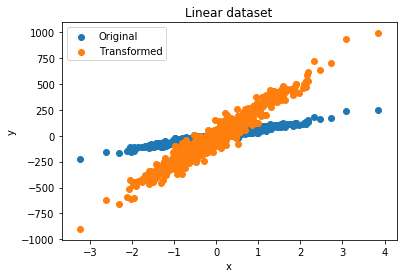

In [286]:
### START CODE HERE ### (~12 lines of code)
trans = torchvision.transforms.Compose([ToFloat32(),ToTensor(),MulTransform(4)])

dataset = LinearData(n_samples=500, transform=[])
xs, ys = [row[0].item() for row in dataset], [row[1].item() for row in dataset]
plt.scatter(xs, ys, label = "Original")

t_dataset = LinearData(n_samples=500, transform=trans)
txs , tys = [row[0].item() for row in t_dataset], [row[1].item() for row in t_dataset]
plt.scatter(txs, tys, label = "Transformed")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear dataset")
### END CODE HERE ###  

## ✍️ Feed-Forward Neural Network

In this chapter you will write your first nueral network on your own!

In this task we will use the well known MNIST dataset. Remember that this is a multiclass classification problem! 

Our nueral network will have 1 hidden layers.

At first, let's define some hyper-parameters:

In [2]:
### Delete this cell with solutions!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
print(device)

cpu


In [117]:
input_size = 784 # 28x28
hidden_size = 240 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001
eps = 1.0 * 10 ** -8

Now, we define our dataset and dataloader for both the train and test set:

In [206]:
# torch.from_numpy(train_dataset.targets[0])
test_dataset.targets[0]

tensor(7)

In [261]:

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                          transform=torchvision.transforms.ToTensor(),  
                                           download=True)
# Added for the ignite part
train_dataset.data = train_dataset.data.reshape(-1, 28*28)
# Need to create a 60000X10 array s.t. if original value is 3 then new value is [0,0,0,1,0,0,0,0,0,0]
old_targets = train_dataset.targets
train_dataset.targets = np.array([[0.0]*10 for _ in old_targets]) # NOTE: MNIST specific becausd assumes 10 classes
for row_ind, val in enumerate(iter(old_targets)):
    train_dataset.targets[row_ind][val.item()] = 1.0-eps # sub eps because 1 is out of range for entropy (TODO: why?)
train_dataset.targets = torch.from_numpy(train_dataset.targets).type(torch.LongTensor)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())
# Added for the ignite part
test_dataset.data = test_dataset.data.reshape(-1, 28*28)
# Need to create a 60000X10 array s.t. if original value is 3 then new value is [0,0,0,1,0,0,0,0,0,0]
old_test_targets = test_dataset.targets
test_dataset.targets = np.array([[0.0]*10 for _ in old_test_targets]) # NOTE: MNIST specific becausd assumes 10 classes
for row_ind, val in enumerate(iter(old_test_targets)):
    test_dataset.targets[row_ind][val.item()] = 1.0#-eps # sub eps because 1 is out of range for entropy (TODO: why?)
test_dataset.targets = torch.from_numpy(test_dataset.targets)#.type(torch.LongTensor)




train_loader = torch.utils.data.DataLoader(dataset=train_dataset,#MyDataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, #MyDataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [231]:
train_dataset.targets.shape
# train_dataset.targets[0][0]
test_dataset.targets.shape
old_test_targets

tensor([7, 2, 1,  ..., 4, 5, 6])

✍️ Define your nueral network class. Use ReLU as your activation.

In [83]:
### START CODE HERE ### (~12 lines of code)
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
### END CODE HERE ###  

✍️ Initialize your model with the above hyper-parameters. 

In [84]:
### START CODE HERE ### (~1 line of code)
model = NeuralNet(input_size, hidden_size, num_classes=num_classes)
print(model)
### END CODE HERE ###  

NeuralNet(
  (l1): Linear(in_features=784, out_features=240, bias=True)
  (l2): Linear(in_features=240, out_features=10, bias=True)
  (relu): ReLU()
)


✍️ Define the loss (which one should you choose? check the documentation and read it deeply! Fix your model definition if needed.) and use SGD as your optimization algorithm.

In [10]:
### START CODE HERE ### (2 lines of code)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
### END CODE HERE ###  

✍️ Write the training loop:

In [97]:
start = time.time()

### START CODE HERE ### (~10 lines of code)
for epoch in range(num_epochs):
    train_iter = iter(train_loader)
    for i, (X_train, y_train) in enumerate(train_iter):
            X_train = X_train.reshape(-1, 28*28).to(device)
        y_train = y_train.to(device)
        y_pred = model(X_train)
        curr_loss = loss(y_pred, y_train) # NOTE: preds should be first
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if((i+1)%100 == 0):
            print(f"Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{len(train_iter)}], loss={curr_loss.item()}")
    
### END CODE HERE ### 

end = time.time()

ValueError: only one element tensors can be converted to Python scalars

In [9]:
print(f"Training took {end-start} seconds.")

Training took 19.8429856300354 seconds.


✍️ Test your model on the test data. 

Make sure you don't waste time computing things you don't need! 

What is your accuracy?

In [10]:
### START CODE HERE ### (~10 lines of code)
with torch.no_grad():
    full_preds = []
    full_test = []
    test_iter = iter(test_loader)
    
    for i, (X_test, y_test) in enumerate(test_iter):
        X_test = X_test.reshape(-1, 28*28).to(device)
        y_preds = model(X_test)
        y_preds = [el.argmax() for el in y_preds.detach().numpy()] # turn preds to list of ints
        
        full_preds += y_preds
        full_test += y_test
        
    print(f"accuracy: {accuracy_score(y_preds, y_test)}")
### END CODE HERE ### 

accuracy: 0.57


### I Try New Things
TODO:
1. Implement data loader V
2. Use ignite to build, train and evaluate a model
3. Add Tensorboard (visualizations)

In [12]:
# Implement data loader
class MyDataLoader():
    
    def __init__(self, dataset, batch_size, shuffle):
        self._curr_batch = -1
        self.shuffle = shuffle
        self.batch_size = batch_size
        
        if not self.shuffle:
            xs_batched = torch.split(dataset.data, batch_size, dim=0)
            ys_batched = torch.split(dataset.targets, batch_size, dim=0)
        else:
            # Random sample for batches
            
            idx_batched = [random.choices(range(len(train_dataset.targets)), 
                                          k=batch_size) for i in range(int(len(dataset.data)/batch_size))]
            
            xs_batched = [train_dataset.data[idx] for idx in idx_batched]
            ys_batched = [train_dataset.targets[idx] for idx in idx_batched]
            
        # .unsqueeze(1) to add a dimention to have have the same shape as the real data (from torch's loader)
        # .float because int/int->int and I want a float
        # division for normalization
        self.dataset = [((x.unsqueeze(1).float()-train_dataset.data.min())/(train_dataset.data.max()-
                                                                            train_dataset.data.min()).item(),
                         y) for x,y in zip(xs_batched, ys_batched)]
        
        
    def __len__(self):
        return len(self.dataset)
        
    def __iter__(self):
        return self #self.dataset#iter([numpy.array([i]) for i in range(10)])
    
    def __next__(self):
        if self._curr_batch >= len(self.dataset)-1:
            self._curr_batch=0
            raise StopIteration
        else:
            self._curr_batch += 1
            return self.dataset[self._curr_batch]
    

In [262]:
my_train_loader = MyDataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
my_test_loader = MyDataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# other_train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
# my_it = iter(my_train_loader)
# ot_it = iter(other_train_loader)
# # Check for equal batches (When shuffle=True, the expected outcome is "False" so...)
# for a,b in zip(my_it, ot_it):
#     print((a[0]==b[0]).all())

In [263]:
# Use Ignite
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss

model = torch.nn.Sequential(
    nn.Linear(input_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,out_features=num_classes),
)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer = create_supervised_trainer(model=model, optimizer=optimizer, loss_fn=loss)
val_metrics = {
    "accuracy": Accuracy(),
    "cel": Loss(loss)
}
evaluator = create_supervised_evaluator(model, metrics=val_metrics)

@trainer.on(Events.ITERATION_COMPLETED(every=100))
def log_training_loss(trainer):
    print("Epoch[{}] Loss: {:.2f}".format(trainer.state.epoch, trainer.state.output))

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    evaluator.run(my_test_loader)
    metrics = evaluator.state.metrics
    print("Validation Results - Epoch: {}  Avg accuracy: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics["accuracy"], metrics["nll"]))


trainer.run(data=my_train_loader, max_epochs=num_epochs)

Epoch[1] Loss: 0.00
Epoch[1] Loss: 0.00
Epoch[1] Loss: 0.00
Epoch[1] Loss: 0.00
Epoch[1] Loss: 0.00


Current run is terminating due to exception: For binary cases, y_pred must be comprised of 0's and 1's..
Engine run is terminating due to exception: For binary cases, y_pred must be comprised of 0's and 1's..
Engine run is terminating due to exception: For binary cases, y_pred must be comprised of 0's and 1's..


Epoch[1] Loss: 0.00


ValueError: For binary cases, y_pred must be comprised of 0's and 1's.

In [264]:
%debug

> /home/dev/installs/anaconda3/lib/python3.7/site-packages/ignite/metrics/accuracy.py(58)_check_binary_multilabel_cases()
     56 
     57         if not torch.equal(y_pred, y_pred ** 2):
---> 58             raise ValueError("For binary cases, y_pred must be comprised of 0's and 1's.")
     59 
     60     def _check_type(self, output: Sequence[torch.Tensor]) -> None:

ipdb> y_pred[0][0]
tensor([-0.0664, -0.0387,  0.0736, -0.1159,  0.0422, -0.0435,  0.0536,  0.0421,
        -0.0714, -0.0342])
ipdb> y[0][0]
tensor(0., dtype=torch.float64)
ipdb> y[0]
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=torch.float64)
ipdb> y[0]
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=torch.float64)
ipdb> y_preds[0]
*** NameError: name 'y_preds' is not defined
ipdb> y_pred[0]
tensor([[-0.0664, -0.0387,  0.0736, -0.1159,  0.0422, -0.0435,  0.0536,  0.0421,
         -0.0714, -0.0342]])
ipdb> quit()


Our accuracy is much better than a random guess, however, we want to improve it!

In order to improve our model preformence we should check whether our model overfits the data or try different hyper-parmeters.

In order to check if our model overfits the data we can plot the loss of the training and the validation as function of the epoch number.
We will not get into it now, but you will do it in your next exercices!

So, now we will try different hyper-parameters in order to achieve better preformance.
However, training took too much time! We must use our resources wisely!
In the next chapter we will learn how to use the gpu!

## Using the GPU

By default all tensors are created on the CPU,
but you can also move them to the GPU (if it's available).

In [362]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


You can directly create a tensor on GPU:

In [363]:
x = torch.rand(5,3) 
print(x, "\n")
y = torch.ones_like(x, device=device)
print(y)

tensor([[0.7509, 0.6720, 0.6881],
        [0.6367, 0.4973, 0.9553],
        [0.8852, 0.1407, 0.2076],
        [0.8921, 0.9662, 0.7724],
        [0.3806, 0.6426, 0.2970]]) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


Or you can just move it to the GPU. 

Additional option to indicate device is to use strings ``.to("cuda")``

In [364]:
x = x.to(device)
print(x)                      

tensor([[0.7509, 0.6720, 0.6881],
        [0.6367, 0.4973, 0.9553],
        [0.8852, 0.1407, 0.2076],
        [0.8921, 0.9662, 0.7724],
        [0.3806, 0.6426, 0.2970]])


It's not possible to convert tensor which is on the GPU to a numpy array because numpy cannot handle GPU tenors.

In [365]:
z = x + y
print(z)
z = z.numpy() 

tensor([[1.7509, 1.6720, 1.6881],
        [1.6367, 1.4973, 1.9553],
        [1.8852, 1.1407, 1.2076],
        [1.8921, 1.9662, 1.7724],
        [1.3806, 1.6426, 1.2970]])


You have to move the tensor to the CPU and then convert it to a numpy array.


In [368]:
z = z.to("cpu")       
z = z.numpy()
print(z)

[[1.7509294 1.6720322 1.6880555]
 [1.6366901 1.4972756 1.9553366]
 [1.8851676 1.1407079 1.2075648]
 [1.8921181 1.9661878 1.7724428]
 [1.3805716 1.6426449 1.2970309]]


Now, after you have learnt how to run tensors on the GPU let's try it!

✍️ Try to run your model from the previous chapter on the GPU.
In order to make it you have to move any inputs/tensors and your model to the GPU.

Did your time performance got better?





Probably, your answer is no.

This can happen when the cost of transferring data between RAM and GPU memory is more than the speedup of parallel computation on the GPU.

It can happen when your model is quite small, or in case when you have too many transfers of data in your forward() function.

If you still want to see improvment in the time preformance, increase the number of epochs and use only 1 batch (batch = all your dataset) 

## RNNs